<a href="https://colab.research.google.com/github/SMBH-1/tbd/blob/main/DL_(CNN)_Project_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#MNIST Fashion Dataset (60_000 images for training & 10_000 images for validation/testing)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape
#type(train_images)
#train_images[0,23,23]

train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

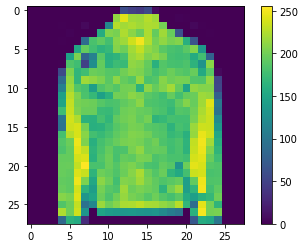

In [5]:
plt.figure()
plt.imshow(train_images[29])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer (1)
    keras.layers.Dense(128, activation='relu'), #hidden layer (2)
    keras.layers.Dense(96, activation='relu'), #hidden layer (3)
    keras.layers.Dense(64, activation='relu'), #hidden layer (4)
    keras.layers.Dense(32, activation='relu'), #hidden layer (5)
    keras.layers.Dense(10, activation='softmax') #output layer (6)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Hyper parameter tuning would be: changing the neurons in each layer (ex: 128),
#the activation functions, the optimizer function, or loss etc.

In [19]:
model.fit(train_images, train_labels, epochs=1) #This generates accuracy on training data

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2227 - accuracy: 0.9152


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

#Because our training data did better (0.9152), the model is overfit. We need to ensure model
#generalizes properly. Maybe it tested too often (epochs) on test data and didn't
#generalize well for non-test data.

313/313 [==============================] - 1s 3ms/step - loss: 0.3616 - accuracy: 0.8765
Test accuracy: 0.8765000104904175


313/313 [==============================] - 0s 2ms/step
9
Ankle boot


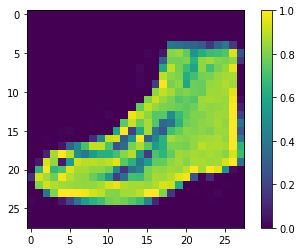

In [23]:
x=3909


predictions = model.predict(test_images)
print(np.argmax(predictions[x]))

print(class_names[np.argmax(predictions[x])])

plt.figure()
plt.imshow(test_images[x])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 67
1/1 [==============================] - 0s 18ms/step
Label: Dress
Guess: Coat


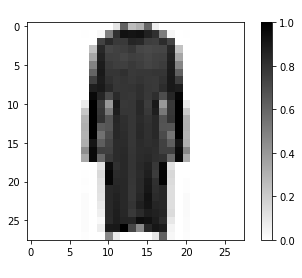

In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  print("Label: " + label)
  plt.xlabel("Guess: " + guess)
  print("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True: 
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")
  
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)